In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('Output/histoire.csv')

In [6]:
df_2018 = df[df['annee_base'] == 2018]
df_2019 = df[df['annee_base'] == 2019]
df_2020 = df[df['annee_base'] == 2020]
df_2021 = df[df['annee_base'] == 2021]
df_2022 = df[df['annee_base'] == 2022]

In [ ]:
df_2018['categoriesuivante'] = df_2018['categorie2019']
df_2019['categoriesuivante'] = df_2019['categorie2020']
df_2020['categoriesuivante'] = df_2020['categorie2021']
df_2021['categoriesuivante'] = df_2021['categorie2022']

In [25]:
df = pd.concat([df_2018, df_2019, df_2020, df_2021])
df = df.drop(['categorie2018',
            'categorie2019',
            'categorie2020',
            'categorie2021',
            'categorie2022',
            'economiesocialesolidaireunitelegale',
            'annee_base',
            'denominationunitelegale',
            'siren',
            'siret',
            'trancheeffectifsetablissement',
            'siret_siege',
            'trancheeffectifsetablissement',
            'activiteprincipaleetablissement',
            'datecreationunitelegale',
            'plus_ancien_etab',
            'activiteprincipaleunitelegale'], axis = 1)

df['libtrancheeffectifsunitelegale'] = df['libtrancheeffectifsunitelegale'].map({
    "1 ou 2 salariés" : 1,
    "3 à 5 salariés" : 3,
    "6 à 9 salariés" : 6,
    "10 à 19 salariés" : 10,
    "20 à 49 salariés" : 20,
    "50 à 99 salariés" : 50,
    "100 à 199 salariés" : 100,
    "200 à 249 salariés" : 200,
    "250 à 499 salariés" : 250,
    "500 à 999 salariés" : 500,
    "1 000 à 1 999 salariés" : 1000,
    "2 000 à 4 999 salariés" : 2000, 
    "5 000 à 9 999 salariés" : 5000
    })

df['categorieentreprise'] = df['categorieentreprise'].map({
    "ETI" : 1,
    "GE" : 2
    })

df['categoriesuivante'] = df['categoriesuivante'].map({
    "ETI" : 1,
    "GE" : 2
    })

df = df.dropna(axis = 0, how = 'any')

df

,categoriejuridiqueunitelegale,libtrancheeffectifsunitelegale,nombre_etablissements,ca,resultat,effectif,longitude,latitude,categorieentreprise,categoriesuivante
7,5720,50.0,1,40700188.0,-118026.0,63.0,-2.186008,47.322992,1,1.0
14,5720,10.0,1,1278000.0,1496000.0,4.0,2.354646,48.748474,1,1.0
17,5599,10.0,1,3615000.0,12831000.0,9.0,2.237226,48.834797,1,1.0
18,5710,50.0,1,19230000.0,1440000.0,56.0,5.064318,47.342935,1,1.0
20,5699,500.0,64,213250000.0,4163000.0,787.0,5.022279,47.286554,1,1.0
...,...,...,...,...,...,...,...,...,...,...
425684,5599,50.0,2,157194000.0,-3059000.0,0.0,1.489178,43.625451,2,2.0
425685,5710,20.0,2,11254604.0,568357.0,45.0,0.616506,44.186103,2,2.0
425686,5710,100.0,4,41701642.0,585649.0,153.0,-1.227279,43.716124,2,2.0
425688,5710,20.0,2,1886724.0,280976.0,24.0,-1.049806,43.710966,2,2.0


In [26]:
cible = df['categoriesuivante']
df = df.drop('categoriesuivante', axis = 1)
liste_variables = list(df.columns)
df = np.array(df)

In [27]:
x_train,x_test,y_train,y_test=train_test_split(df,cible,test_size=0.25, random_state=2020)
rf = RandomForestRegressor(n_estimators = 100, random_state = 2020)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=2020)

In [28]:
predictions = rf.predict(x_test)

In [29]:
erreurs = abs(predictions - y_test)
print('Mean Absolute Error:', round(np.mean(erreurs), 2))

Mean Absolute Error: 0.04


In [30]:
# MAPE
mape = 100 * (erreurs / y_test)
print('Mean Absolute Percentage Error :', round(np.mean(mape), 2), '%.')

Mean Absolute Percentage Error : 2.92 %.


Text(0.5, 0, 'Relative Importance')

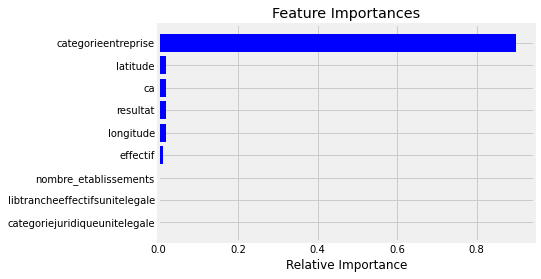

In [31]:
importances = rf.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
%matplotlib inline
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel('Relative Importance')